# Using wavelet transform for time-frequency analysis


Background:

https://en.wikipedia.org/wiki/Continuous_wavelet_transform


In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

In [3]:
## (custom) Numerical implementation

In [4]:
import numpy as np
from scipy import signal

### MORLET WAVELET, definition, properties and normalization
def Morlet_Wavelet(t, f, w0=6.):
    x = 2.*np.pi*f*t
    output = np.exp(1j * x)
    output *= np.exp(-0.5 * ((x/w0) ** 2)) # (Normalization comes later)
    return output

def Morlet_Wavelet_Decay(f, w0=6.):
    """
    Time value of the wavelet where the amplitude decays of 
    """
    return 2 ** .5 * (w0/(np.pi*f))

def from_fourier_to_morlet(freq):
    x = np.linspace(0.1/freq, 2.*freq, 1e3)
    return x[np.argmin((x-freq*(1-np.exp(-freq*x)))**2)]
    
def get_Morlet_of_right_size(f, dt, w0=6., with_t=False):
    Tmax = Morlet_Wavelet_Decay(f, w0=w0)
    t = np.arange(-int(Tmax/dt), int(Tmax/dt)+1)*dt
    if with_t:
        return t, Morlet_Wavelet(t, f, w0=w0)
    else:
        return Morlet_Wavelet(t, f, w0=w0)

def norm_constant_th(freq, dt, w0=6.):
    # from theoretical calculus:
    n = (w0/2./np.sqrt(2.*np.pi)/freq)*(1.+np.exp(-w0**2/2))
    return n/dt

def my_cwt(data, frequencies, dt, w0=6.):
    """
    wavelet transform with normalization to catch the amplitude of a sinusoid
    """
    output = np.zeros([len(frequencies), len(data)], dtype=np.complex)

    for ind, freq in enumerate(frequencies):
        wavelet_data = np.conj(get_Morlet_of_right_size(freq, dt, w0=w0))
        sliding_mean = signal.convolve(data,
                                       np.ones(len(wavelet_data))/len(wavelet_data),
                                       mode='same')
        # the final convolution
        wavelet_data_norm = norm_constant_th(freq, dt, w0=w0)
        output[ind, :] = signal.convolve(data-sliding_mean+0.*1j,
                                         wavelet_data,
                                         mode='same')/wavelet_data_norm
    return output

## The Morlet Wavelet

https://en.wikipedia.org/wiki/Morlet_wavelet


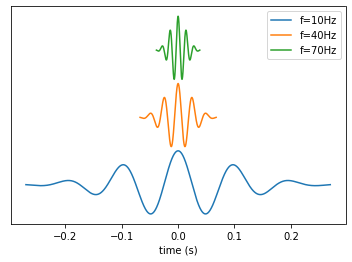

In [7]:
# Morlet wavelet:

dt, tstop = 1e-4, 1.
t = np.arange(int(tstop/dt))*dt
for i, f in enumerate([10., 40., 70.]):
    t, wavelet = get_Morlet_of_right_size(f, dt, with_t=True)
    plt.plot(t, np.real(wavelet)+2*i, label="f=%.0fHz"%f) # only real part projection
plt.xlabel('time (s)')
plt.yticks([])
plt.legend()

## Continuous Wavelet transform 

Here using the above morlet wavelet

/home/yann/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)
/home/yann/anaconda3/lib/python3.7/site-packages/datavyz/time_freq.py:23: UserWarning: The following kwargs were not used by contour: 'aspect'
  c = AX[1][0].contourf(t, freqs, coefs, cmap='PRGn', aspect='auto')


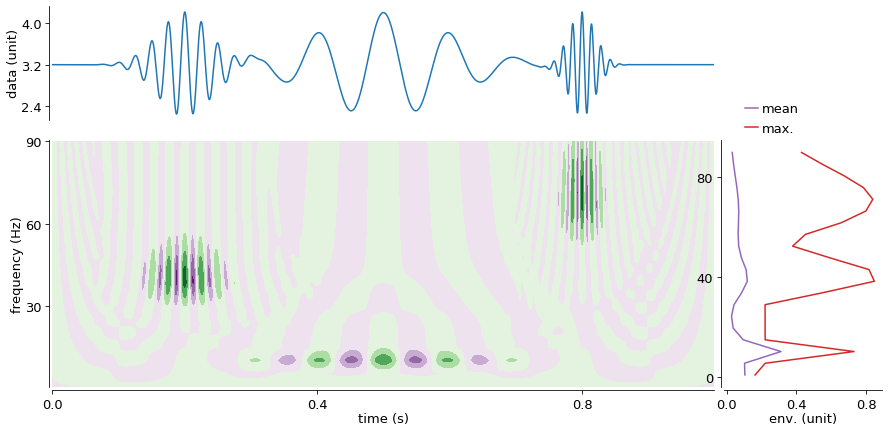

In [8]:
noise_level = 0. # NO NOISE to start
nfreq=20

# temporal sampling
dt, tstop = 1e-4, 1.
t = np.arange(int(tstop/dt))*dt
    
# ### artificially generated signal, transient oscillations
freq1, width1, freq2, width2, freq3, width3 = 10., 100e-3, 40., 40e-3, 70., 20e-3

data  = 3.2+np.cos(2*np.pi*freq1*t)*np.exp(-(t-.5)**2/2./width1**2)+\
                np.cos(2*np.pi*freq2*t)*np.exp(-(t-.2)**2/2./width2**2)+\
                np.cos(2*np.pi*freq3*t)*np.exp(-(t-.8)**2/2./width3**2)

# ### adding colored noise to test robustness
data += noise_level*np.convolve(np.exp(-np.arange(1000)*dt/400e-3),\
                            np.random.randn(len(t)), mode='same') # a slow one
data += noise_level*np.convolve(np.exp(-np.arange(1000)*dt/5e-3),\
                            np.random.randn(len(t)), mode='same') # a faster one

# Continuous Wavelet Transform analysis
freqs = np.linspace(1, 90, nfreq)
coefs = my_cwt(data, freqs, dt)

from datavyz import gen as ge
ge.time_freq_plot(t, freqs, data, coefs);

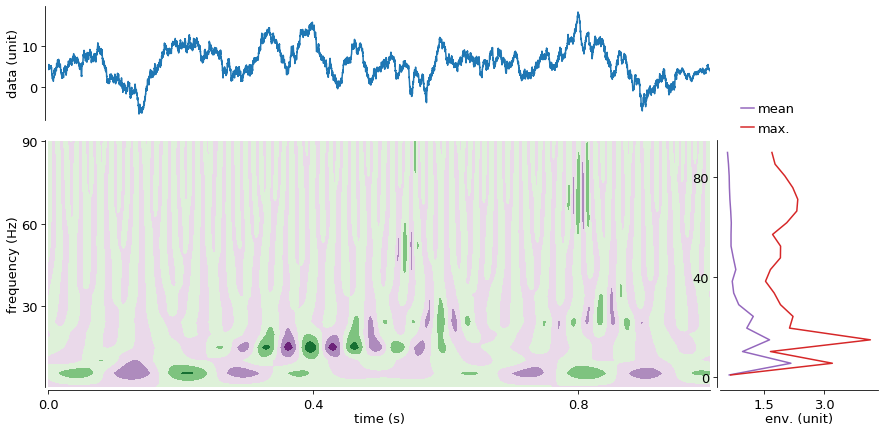

In [11]:
noise_level = 0.2 # NO NOISE to start
nfreq=20

# temporal sampling
dt, tstop = 1e-4, 1.
t = np.arange(int(tstop/dt))*dt
    
# ### artificially generated signal, transient oscillations
freq1, width1, freq2, width2, freq3, width3 = 10., 100e-3, 40., 40e-3, 70., 20e-3

data  = 3.2+np.cos(2*np.pi*freq1*t)*np.exp(-(t-.5)**2/2./width1**2)+\
                np.cos(2*np.pi*freq2*t)*np.exp(-(t-.2)**2/2./width2**2)+\
                np.cos(2*np.pi*freq3*t)*np.exp(-(t-.8)**2/2./width3**2)

# ### adding colored noise to test robustness
data += noise_level*np.convolve(np.exp(-np.arange(1000)*dt/400e-3),\
                            np.random.randn(len(t)), mode='same') # a slow one
data += noise_level*np.convolve(np.exp(-np.arange(1000)*dt/5e-3),\
                            np.random.randn(len(t)), mode='same') # a faster one

# Continuous Wavelet Transform analysis
freqs = np.linspace(1, 90, nfreq)
coefs = my_cwt(data, freqs, dt)

from datavyz import gen as ge
ge.time_freq_plot(t, freqs, data, coefs);